<a href="https://colab.research.google.com/github/Shuaynat/DSE-23-24/blob/main/DS_ICEF_class4_classify_rf_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This class is about classification and Random Forest

Let us load data

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,StratifiedGroupKFold,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate


In [ ]:
!wget -c https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv


--2023-09-26 16:28:37--  https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66976 (65K) [text/plain]
Saving to: ‘flats_moscow.csv’

flats_moscow.csv    100%[===================>]  65.41K  --.-KB/s    in 0.02s   

2023-09-26 16:28:37 (2.65 MB/s) - ‘flats_moscow.csv’ saved [66976/66976]



In [ ]:
import pandas as pd
flats = pd.read_csv("flats_moscow.csv")

In [ ]:
flats.head()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [ ]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


Suppose we want to predict the walk variable:
to classify whether flat is within walking distance or not

In [ ]:
import sklearn


In [ ]:
flats.columns

Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'walk', 'brick', 'floor', 'code'],
      dtype='object')

In [ ]:
flats.drop(columns= 'Unnamed: 0',inplace=True)

In [ ]:
flats.columns[flats.columns!="walk"]

Index(['price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'brick',
       'floor', 'code'],
      dtype='object')

Define X and y

In [ ]:
y_flats = flats["walk"]
X_flats = flats[flats.columns[flats.columns!="walk"]]

Make classification using decision tree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, criterion ="entropy" )

Fit a decision tree

In [ ]:
clf.fit(X = X_flats,y = y_flats)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Beatiful tree

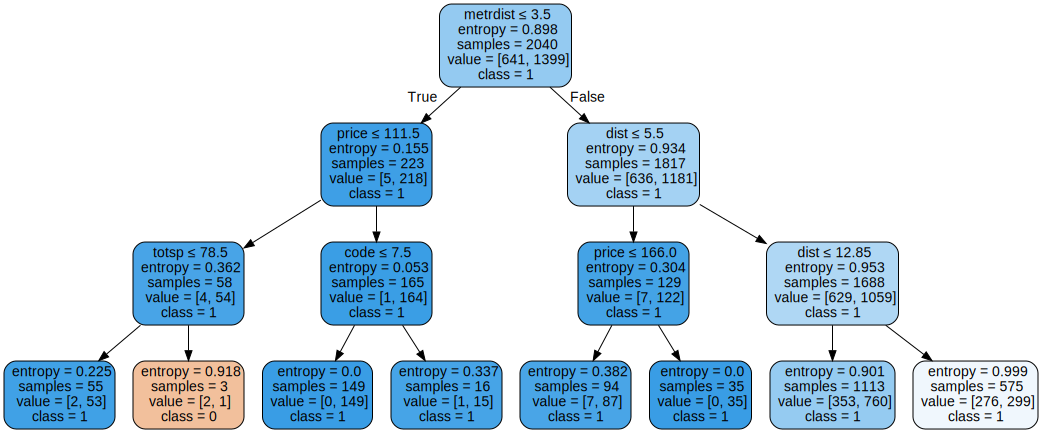

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf, out_file=None,
                     feature_names=X_flats.columns,
                      class_names = ["0","1"],
                    filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

Let us look at how we can make our tree more stable

#Classification
Metrics of classification:


*   Accuracy
*   Precision
*   Recall
*   ROC AUC



How to measure quality of classification:

Approach:



1.   On one part of dataset train your algorithm
2.  On test part evaluate classification and make prediction comparison with true data




## Precision and Recall

Precision and Recall are two other measures for evaluation of classification quality. Both of the metrics are calculated based on **confusion matrix**.

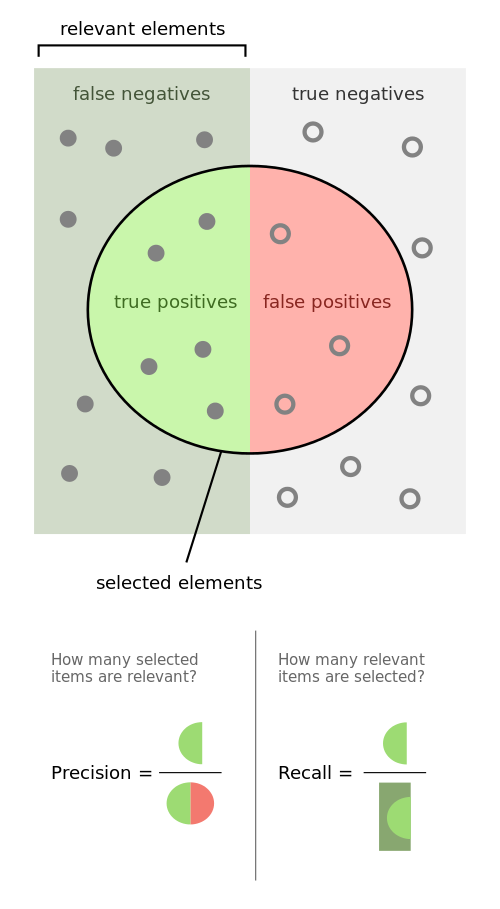<img

Note that Recall equals to True Positive Rate.

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_flats, y_flats, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_flats = DecisionTreeClassifier(criterion=
                                   "entropy",max_depth= 3)
clf_flats.fit(X_train,y_train)

y_flats_pred = clf_flats.predict(X_test)

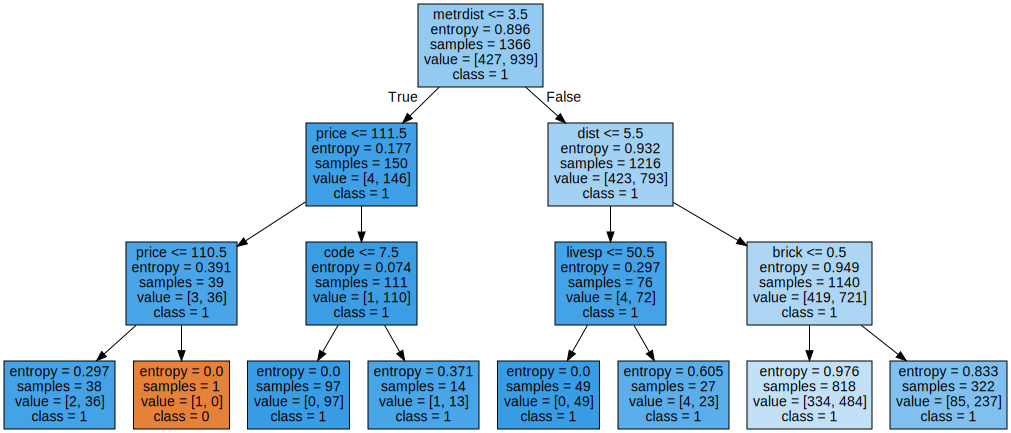

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf_flats,
                     feature_names=X_train.columns,
                      class_names = ["0","1"],
                                        filled = True,
                                        )
graph = graphviz.Source(dot_data)
graph

In [ ]:
clf_flats.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
clf_flats.predict_proba(X_test)

array([[0.40831296, 0.59168704],
       [0.40831296, 0.59168704],
       [0.        , 1.        ],
       ...,
       [0.26397516, 0.73602484],
       [0.40831296, 0.59168704],
       [0.40831296, 0.59168704]])

The accuracy on the test dataset:

In [ ]:
sklearn.metrics.accuracy_score(y_true=y_train, y_pred = clf_flats.predict(X_train))

0.6881405563689604

In [ ]:
sklearn.metrics.accuracy_score(y_true=y_test, y_pred = y_flats_pred)

0.6810089020771514

###Exercise: write your own accuracy, precision and recall

In [ ]:
def my_accuracy(y_true, y_pred):
  #your code here
  return 0

def my_recall(y_true, y_pred ):
  #your code here
  return 0

def my_precision(y_true, y_pred ):
  #your code here
  return 0

###Recall/Precision/ Accuracy Solution Spoilers here:

In [ ]:
def my_accuracy(y_true,y_pred):
  return len(y_test[y_true==y_pred])/len(y_true)

In [ ]:
def my_precision(y_true, y_pred):
  num_class_as_1 = sum(y_pred)
  True_Positive = sum(y_true*y_pred)
  return True_Positive/num_class_as_1

In [ ]:
def my_recall(y_true, y_pred):
  num_TRUEs = sum(y_true)
  True_Positive = sum(y_true*y_pred)
  return True_Positive/num_TRUEs

Calculate metrics and intpret them

In [ ]:
my_recall(y_true= y_test,y_pred = y_flats_pred)

0.808695652173913

In [ ]:
my_precision(y_true= y_test,y_pred = y_flats_pred)

0.8017241379310345

In [ ]:
my_accuracy(y_true= y_test,y_pred = y_flats_pred)

0.7329376854599406

##Precision recall curve curve

## Confusion matrix

Confusion matrix is table layout that allows visualization of the performance of an algorithm. Rows of this matrix correspond to actual classes of the test set, columns correspond to predicted labels. There are 4 types of elements if predictions are given:
* True Positive
* False Negative
* False Positive
* True Negative

| Variable | Predicted True | Predicted False |
| ------------- |-------------|-----|
| **Actual True**  | TP | FN |
| **Actual False** | FP | TN |


If we want to compare metrics on different data, we can use instead True Positive Rate and False Positive Rate:
* False Positive Rate is $\frac{FP}{FP + TN}$
* True  Positive Rate is $\frac{TP}{TP + FN}$

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true= y_test, y_pred = y_flats_pred)
TN, FP = confusion[0, 0], confusion[0, 1]
FN, TP = confusion[1, 0], confusion[1, 1]

In [ ]:
print(confusion)

[[122  92]
 [ 88 372]]


In [ ]:
recall = TP / (TP + FN)
print("check recall ",recall)

0.808695652173913


In [ ]:
precision = TP / (TP + FP)

print("Precision: %.2f%%" % (100 * precision))

Precision: 80.17%


Also the classsifier can predic probaility by
methoc predict_proba

In [ ]:
training_probabilities_dt = clf_flats.predict_proba(X = X_train)

test_probailities =  clf_flats.predict_proba(X = X_test)
print(training_probabilities_dt)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
print(clf_flats.classes_)

[0 1]


In [ ]:
training_probabilities_dt[:,1]

array([1., 1., 1., ..., 1., 1., 0.])

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [ ]:
# generate values for training Precision Recall curve
training_precision_dt, training_recall_dt, tresholds_train = precision_recall_curve(y_train, training_probabilities_dt[:,1])

# TODO calculate value under precision-recall curve
training_pr_auc_dt = average_precision_score(y_train, training_probabilities_dt[:,1])

print("DT PR-AUC on training data:", training_pr_auc_dt)


DT PR-AUC on training data: 1.0


In [ ]:
# generate values for test Precision Recall curve
test_precision_dt, test_recall_dt, tresholds_test = precision_recall_curve(y_test, test_probailities[:,1])

# TODO calculate value under test precision-recall curve
test_pr_auc_dt = average_precision_score(y_test, test_probailities[:,1])

print("DT PR-AUC on test data:", test_pr_auc_dt)

DT PR-AUC on test data: 0.7789146228072907


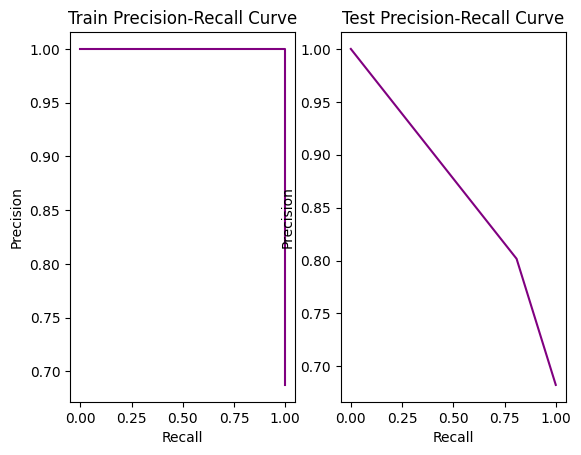

In [ ]:
import matplotlib.pyplot as plt

#create precision recall curve
fig, ax = plt.subplots(1,2)

#plot train data
ax[0].plot(training_recall_dt, training_precision_dt, color='purple')

#add axis labels to plot
ax[0].set_title('Train Precision-Recall Curve')
ax[0].set_ylabel('Precision')
ax[0].set_xlabel('Recall')



ax[1].plot(test_recall_dt, test_precision_dt, color='purple')

#add axis labels to plot
ax[1].set_title('Test Precision-Recall Curve')
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
#display plot
plt.show()

## ROC AUC curve

ROC stands for *Receiver Operating Characteristic*. This curve shows True Positive Rate (**TPR**) against False Positive Rate (**FPR**) as classifier's discrimination threshold is varied

Remember that classifiers are usually constructed based on some function classifeir taking values

    
**roc_curve** function from *scikit-learn* allows to easily obtain ROC curve points and **threshold** values.

If we want to compare metrics on different data, we can use instead True Positive Rate and False Positive Rate:
* False Positive Rate is $\frac{FP}{FP + TN}$
* True  Positive Rate is $\frac{TP}{TP + FN}$

####Exercise:
calculate ROC-AUC by plotting ROC-AUC curve

For each threshold value for model output score (probability of spam class): 0.1, 0.15, 0.4,  0.7,  0.9. calculate False Positive rate and True positive rate.
Than make a plot

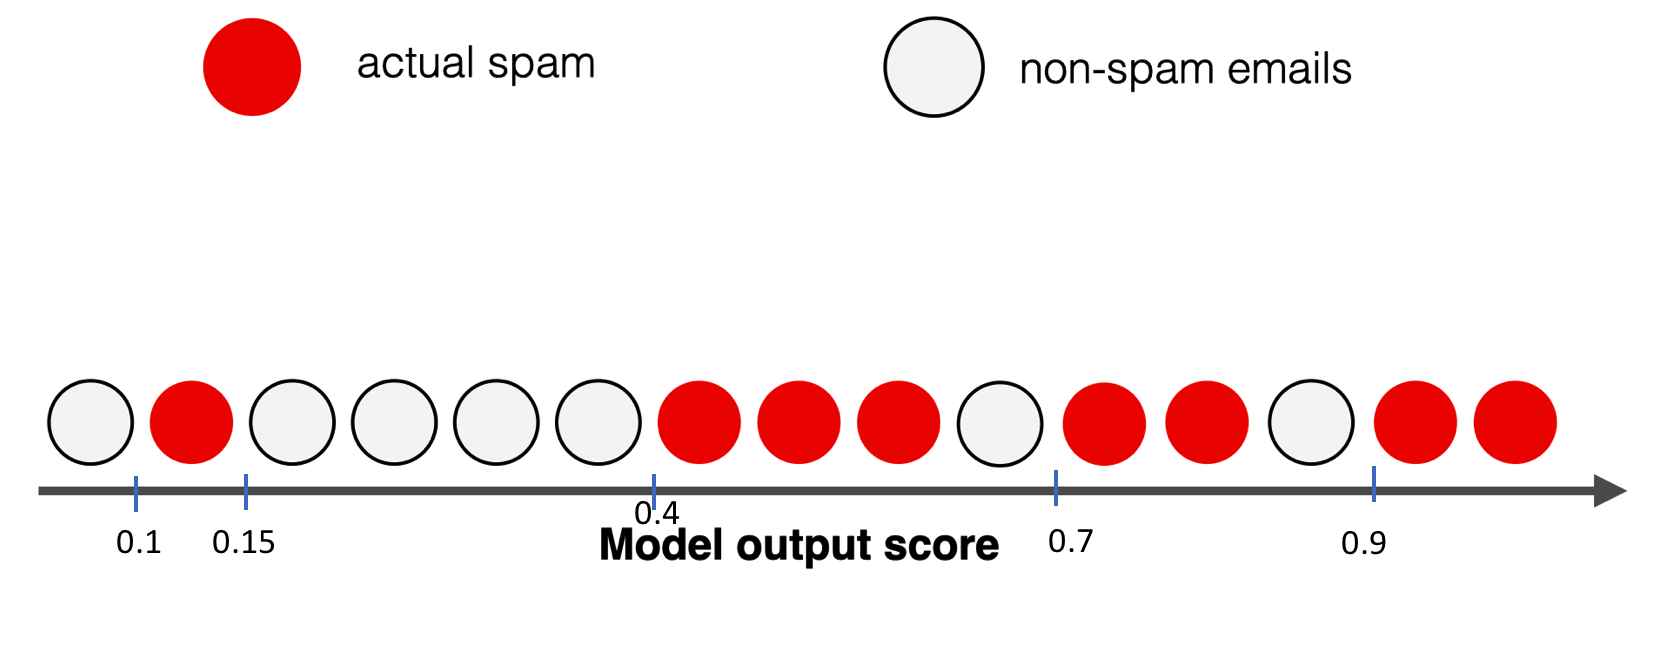

In [ ]:
TPR = FP/(FP+TN)
FPR = TP/(TP+FN)

## Coding in sklearn

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0.5, 1.0, 'Test ROC AUC curve')

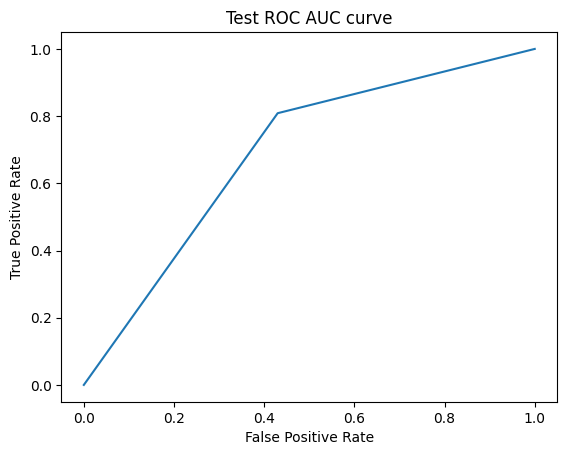

In [ ]:
fp_rates, tp_rates, thresholds = roc_curve(y_true = y_test, y_score = test_probailities[:,1])
plt.plot(fp_rates, tp_rates)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Test ROC AUC curve")


Understading ROC_AUC curve

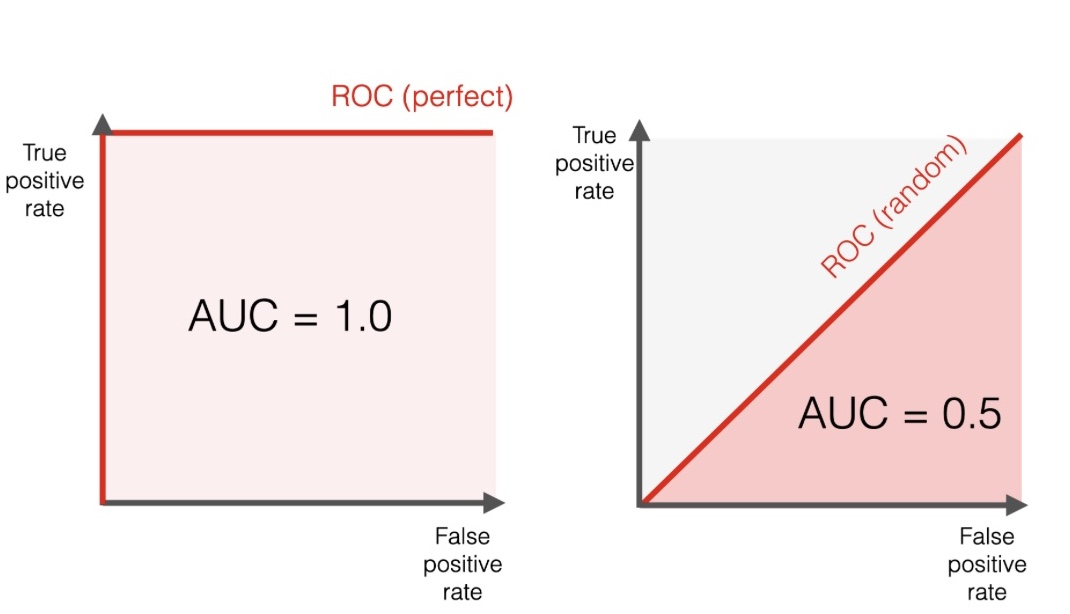

![](https://alexanderdyakonov.files.wordpress.com/2017/07/pic2.png)

ROC-curves for the best classiefier (AUC=1), random (AUC=0.5) and worst (AUC=0) classiefier.

Thus, AUC ROC is equal to the proportion of pairs of objects of the form (object of class 1, object of class 0) that the algorithm has correctly ordered, i.e. the first object is in the ordered list earlier. Numerically , this can be written as:

choosimg a treshold for binarization
![](https://alexanderdyakonov.files.wordpress.com/2017/07/pic4.png)

In [ ]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


fig = px.area(
    x=fp_rates, y=tp_rates,
    title=f'ROC Curve (AUC={auc(fp_rates, tp_rates):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.ad
fig.show()

NameError: ignored

In [ ]:
fig_hist = px.histogram(
    x=test_probailities[:,1],color=y_test, nbins=50,
    labels=dict(color='True Labels', x='Score')
)
fig_hist.show()


###F1 score

*for later reading*

**F1 score**:

This metric allows to take into account a different cost for False Positive Errors and False Negative Errors.

General $F_\beta$ score is defined as follows:
$$
F_\beta = (1 + \beta^2) \frac{Precision \cdot Recall}{\beta^2 Precision + Recall} = \frac{1 + \beta^2}{\frac{\beta^2}{Recall} + \frac{1}{Precision}}= \frac{\beta + \beta^{-1}}{\beta\frac{1}{\text{Recall}} + \beta^{-1}\frac{1}{\text{Precision}}}
    \,.
$$

Most commonly used is $F_1$ score:
$$
F_1 = \frac{Precision \cdot Recall}{Precision + Recall}
$$

Harmonic mean is used in order to make metric value very small when Precision or Recall is close to zero. Note that $F_1$ score doesn't describe how classifier works for True Negative results (**TN**).

Interesting links on ROC AUC curve and decision trees:


1.  http://www.navan.name/roc
2.   https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%d0%bf%d0%bb%d0%be%d1%89%d0%b0%d0%b4%d1%8c-%d0%bf%d0%be%d0%b4-%d0%ba%d1%80%d0%b8%d0%b2%d0%be%d0%b9-%d0%be%d1%88%d0%b8%d0%b1%d0%be%d0%ba/
3.  https://www.w3schools.com/python/python_ml_decision_tree.asp



#Random forest

Based on idea of bagging: combining algorithms that are trained on subsamples.


linear combination of u=output of this algorithm seem to be more stable.

Try Bagging

Algorithm Random Forest $a_N(x)$, where $N$ = number of trees in a forest(parameter n_estimators in sklearn)

For each n from 1 to N:

  1. Generate a sample $S_n$ of size N (use bootstrap: sampling object (row) from dataset with replacement)
  
  2. Next build a decision tree $b_n(x)$ for sample $S_n$:
    - build tree until there are not greater than $n_{min}$ objects(rows)

    - Firstly, there are chosen m random features from dataset features in each
    
     split and optimal split is held only among this subset of m random features
        
        
3.  Return  composition $a_N(x) =  \frac{1}{N} \sum_{n=1}^{N}{b_n}$




In [ ]:
from sklearn.tree import DecisionTreeClassifier
list_of_algos = []
sub_sample_size = int(0.9*len(X_flats))

#fit model
for i in range(200):
  clf = DecisionTreeClassifier(max_depth=5)
  #choose random indices
  indices = np.random.choice(a= X_flats.index, size = sub_sample_size, replace = True)
  clf.fit(X_flats.loc[indices,:],y_flats[indices])
  list_of_algos.append(clf)

#predict
Predict_bagging = list_of_algos[0].predict(X_flats)
for i in range(1, len(list_of_algos)):
  Predict_bagging = (Predict_bagging+list_of_algos[i].predict(X_flats)/i)*(i/(i+1))
print(Predict_bagging)
print(sum((y_flats - Predict_bagging)**2)/len(y_flats))
print(sum((y_flats - list_of_algos[0].predict(X_flats))**2)/len(y_flats))

[0.78  0.365 0.935 ... 0.72  0.82  0.985]
0.17533479166666655
0.2696078431372549


In [ ]:
class BaggingTreesClassifier:
  def __init__(self, max_depth = 4, n_estimators = 10, subsample_prop = 0.9):
    self.max_depth = max_depth
    self.n_estimators = n_estimators
    self.subsample_prop = subsample_prop
    self.clf_list = [DecisionTreeClassifier(max_depth=self.max_depth) for i in range(n_estimators)]

  def fit(self, X, y):
    sub_sample_size = int(self.subsample_prop*len(X))
    for i in range(len(self.clf_list)):
      indices = np.random.choice(a= X.index, size =sub_sample_size, replace = True)
      self.clf_list[i].fit(X.loc[indices,:],y[indices])

  def predict(self, X):
    Predict_bagging = self.clf_list[0].predict(X)
    for i in range(1, len(self.clf_list)):
       Predict_bagging = (Predict_bagging+self.clf_list[i].predict(X)/i)*(i/(i+1))
    return Predict_bagging


  def predict_proba(self, X):
    Predict_bagging = self.clf_list[0].predict(X)
    for i in range(1, len(self.clf_list)):
       Predict_bagging = (Predict_bagging+self.clf_list[i].predict_proba(X)/i)*(i/(i+1))
    return Predict_bagging

In [ ]:
bagging = BaggingTreesClassifier()
bagging.fit(X_train ,y_train)
bagging.predict(X_test)

array([0.9, 0.7, 1. , 1. , 0.6, 1. , 1. , 0.8, 0.9, 1. , 0.8, 1. , 0.9,
       1. , 0.9, 0.7, 0.8, 0.9, 0.7, 0.7, 1. , 0.9, 1. , 0.8, 1. , 1. ,
       0.9, 0.7, 0.8, 0.9, 1. , 0.8, 1. , 1. , 0.8, 0.6, 1. , 0.9, 0.7,
       0.9, 0.7, 0.9, 0.8, 0.8, 0.5, 1. , 1. , 0.7, 0.8, 1. , 0.9, 0.9,
       1. , 0.7, 0.8, 0.6, 0.6, 0.8, 1. , 0.7, 0.7, 0.7, 0.8, 1. , 0.9,
       0.8, 0.6, 1. , 0.9, 1. , 0.7, 1. , 0.5, 1. , 1. , 1. , 1. , 0.8,
       0.9, 1. , 1. , 1. , 0.7, 1. , 1. , 0.7, 0.8, 0.8, 0.6, 0.6, 1. ,
       0.9, 1. , 0.8, 1. , 0.6, 0.8, 0.9, 0.6, 0.8, 0.5, 0.8, 1. , 0.9,
       1. , 0.5, 0.6, 0.7, 0.6, 0.7, 1. , 0.9, 1. , 1. , 0.6, 0.9, 1. ,
       1. , 1. , 0.6, 1. , 0.9, 1. , 1. , 1. , 0.9, 1. , 0.8, 1. , 1. ,
       0.7, 0.9, 1. , 0.8, 0.7, 0.8, 0.5, 0.9, 1. , 0.9, 1. , 1. , 0.7,
       0.5, 0.6, 0.8, 0.8, 0.6, 1. , 1. , 1. , 1. , 0.6, 1. , 1. , 1. ,
       0.8, 0.7, 0.8, 0.9, 0.6, 1. , 1. , 1. , 1. , 0.7, 0.8, 0.8, 1. ,
       0.9, 0.8, 0.8, 1. , 0.8, 1. , 0.7, 1. , 0.8, 0.7, 0.7, 1.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Parametres: are
n_estimators number of trees in a random forest

In [ ]:
model = RandomForestClassifier(n_estimators=5, max_features=6, max_depth=2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
rs = []
for m in model.estimators_:
    rs.append(m.random_state)

print(rs)

0.6824925816023739
[1791095845, 2135392491, 946286476, 1857819720, 491263]


 n_estimators

In [ ]:
train_score, test_score = [], []
for param_value_n in range(1, 50, 2):
  #initialise model
  clf = RandomForestClassifier(n_estimators=param_value_n, max_features=8,
                               max_depth=6, random_state=1, n_jobs=-1)
  #fit model
  clf.fit(X_train, y_train)
  #evaluate
  train_score.append(accuracy_score(y_train, clf.predict(X_train)))
  test_score.append(accuracy_score(y_test, clf.predict(X_test)))



plotting

In [ ]:
import matplotlib.pyplot as plt

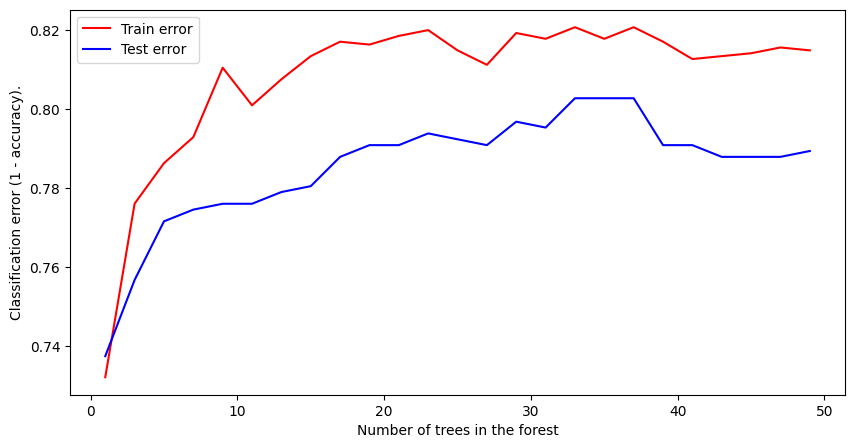

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,50,2)), train_score, c='r', label='Train error')
plt.plot(list(range(1,50,2)), test_score, c='b', label='Test error')
plt.xlabel('Number of trees in the forest')
plt.ylabel('Classification error (1 - accuracy).')
plt.legend();

 max_depth

In [ ]:
train_score, test_score = [], []
for depth in range(1, 30):
  #initialise model
  clf = RandomForestClassifier(n_estimators=33, max_features=8,
                               max_depth=depth, random_state=1, n_jobs=-1)
  #fit model
  clf.fit(X_train, y_train)
  #evaluate
  train_score.append(accuracy_score(y_train, clf.predict(X_train)))
  test_score.append(accuracy_score(y_test, clf.predict(X_test)))



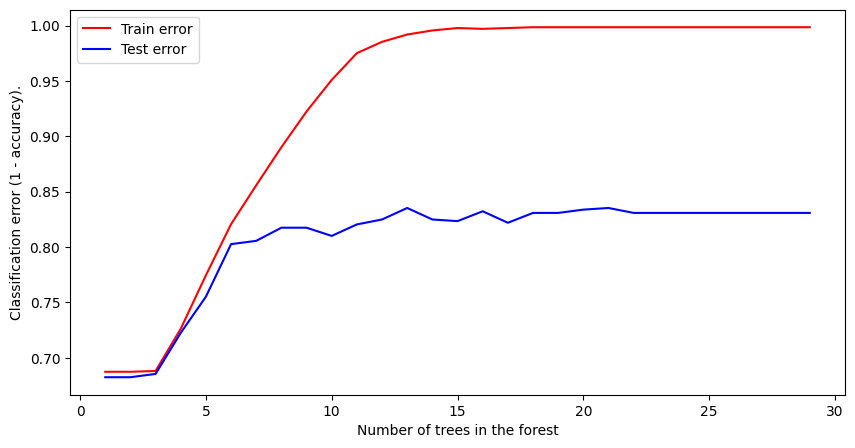

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list( range(1, 30)),train_score, c='r', label='Train error')
plt.plot(list( range(1, 30)), test_score, c='b', label='Test error')
plt.xlabel('Number of trees in the forest')
plt.ylabel('Classification error (1 - accuracy).')
plt.legend();

## Grid search CV

What if we want combinations pof parametes and use with cross validation.

In [ ]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators':[20,40, 100 ], 'max_depth':[1, 3, 5,7]}
gs_clf = GridSearchCV(clf_rf, parameters)
gs_clf.fit(X_train, y_train)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)

{'max_depth': 7, 'n_estimators': 40}
{'mean_fit_time': array([0.04510665, 0.07845893, 0.17718544, 0.02665625, 0.05428486,
       0.12750387, 0.03331666, 0.05910773, 0.15843053, 0.05912457,
       0.10104094, 0.20905223]), 'std_fit_time': array([0.00715493, 0.00577641, 0.13153757, 0.00042549, 0.00486162,
       0.00195466, 0.00285864, 0.00254054, 0.03740487, 0.01141426,
       0.00360054, 0.04202074]), 'mean_score_time': array([0.00497332, 0.00570159, 0.00904193, 0.00291004, 0.00431433,
       0.00726986, 0.00334616, 0.00406303, 0.0089828 , 0.0050735 ,
       0.00721135, 0.00984135]), 'std_score_time': array([3.45694627e-04, 4.33034655e-04, 4.88250959e-03, 4.45028827e-05,
       4.10808720e-04, 2.33223730e-04, 2.67941346e-04, 3.85467915e-05,
       2.32492606e-03, 3.59858088e-04, 8.60806014e-04, 2.35477261e-03]), 'param_max_depth': masked_array(data=[1, 1, 1, 3, 3, 3, 5, 5, 5, 7, 7, 7],
             mask=[False, False, False, False, False, False, False, False,
                   False, 

In [ ]:
gs_clf.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=40)

In [ ]:
print(gs_clf.best_estimator_)

## Feature importances

In [ ]:
print(X_train.columns)

Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'brick', 'floor', 'code'],
      dtype='object')


In [ ]:
gs_clf.best_estimator_.feature_importances_

array([0.0811538 , 0.15763016, 0.0969464 , 0.07555322, 0.05836736,
       0.17552939, 0.16583563, 0.05710149, 0.01112533, 0.12075722])

Plot feature importances

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

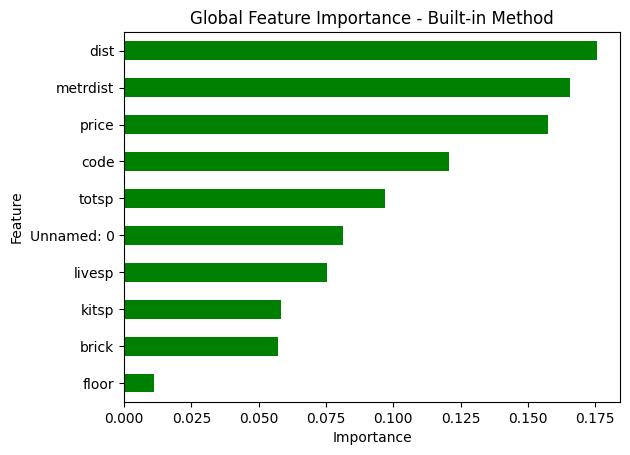

In [ ]:
import matplotlib.pyplot as plt

global_importances = pd.Series(gs_clf.best_estimator_.feature_importances_,
                               index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

Built in method:

We can measure how each feature decrease the impurity(information gain) of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance.

The impurity-based feature importances computed on tree-based models suffer from two flaws that can lead to misleading conclusions.


1.   They are computed on statistics derived from the training dataset and therefore do not necessarily inform us on which features are most important to make good predictions on held-out dataset.
2.   Secondly, they favor high cardinality features, that is features with many unique values

3.  In the case of correlated features it can select one of the feature and neglect the importance of the second one


###Permutation feature importances

{'importances_mean': array([-0.00830861,  0.03620178,  0.01602374, -0.00830861, -0.00267062,
        0.05519288,  0.015727  ,  0.01246291,  0.00089021,  0.05341246]), 'importances_std': array([0.00446092, 0.00626668, 0.00625261, 0.00660862, 0.00316827,
       0.00892184, 0.00680555, 0.00404694, 0.00346051, 0.00615325]), 'importances': array([[-0.01038576, -0.01186944, -0.0074184 ,  0.        , -0.01186944],
       [ 0.03560831,  0.04747774,  0.03115727,  0.03709199,  0.02967359],
       [ 0.01928783,  0.01038576,  0.01038576,  0.02670623,  0.01335312],
       [-0.00296736, -0.00296736, -0.01780415, -0.00296736, -0.0148368 ],
       [-0.00296736, -0.0074184 , -0.00445104,  0.00148368,  0.        ],
       [ 0.0652819 ,  0.06676558,  0.04896142,  0.04599407,  0.04896142],
       [ 0.01632047,  0.02077151,  0.01632047,  0.00296736,  0.02225519],
       [ 0.00890208,  0.01928783,  0.0148368 ,  0.01038576,  0.00890208],
       [ 0.        , -0.00445104,  0.00296736,  0.00593472,  0.        

Text(0.5, 1.0, 'Permutation Feature Importance')

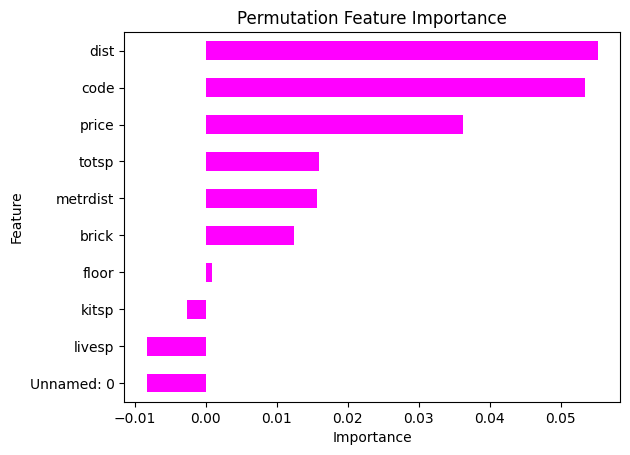

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(gs_clf.best_estimator_,
                                         X_test, y_test)
print(perm_importance)
perm_importance = pd.Series(perm_importance['importances_mean'],
                               index=X_test.columns)
perm_importance.sort_values(ascending=True, inplace=True)
perm_importance.plot.barh(color='magenta')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")

## Shap feature importances

install shap library using pip

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 12.4 MB/s eta 0:00:00


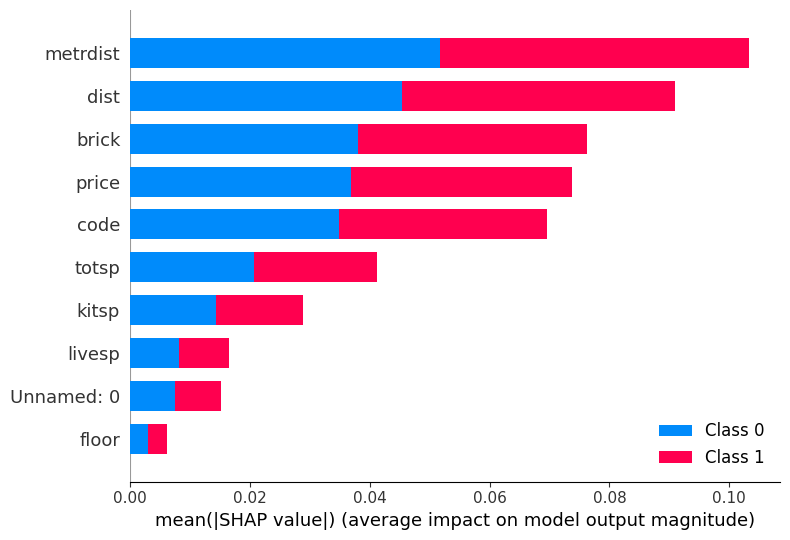

In [ ]:
import shap
explainer = shap.TreeExplainer(gs_clf.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, )
                 # plot_type="bar")

# Cross-validation technique

In many cases test sample is not available or we have a small dataset, and we have only one sample: a training one. The most popular approach in this case is **cross-validation**.

The most common way is $k$-fold cross-validation. The idea is to divide training sample into $k$ blocks, one of them is treated as an artificial test sample and other $k-1$ are used for training.

*scikit* has several functions for dividing data into folds and for performing automated cross-validation. One of those functions is **GridSearchCV()**.

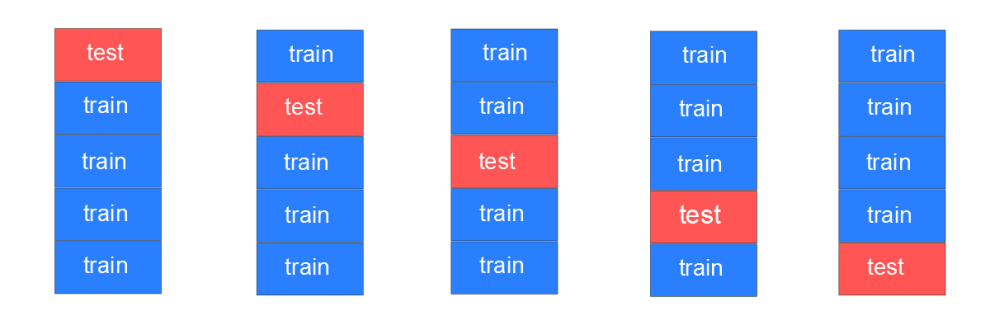

Write your kfold cross validation

StratifiedKFold split

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=3)
print(skf.get_n_splits(X_train, y_train))
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    rf = RandomForestClassifier()
    rf.fit(X_train.iloc[train_index,:],y_train.iloc[train_index])
    print("accuracy",
        accuracy_score(rf.predict(X_train.iloc[test_index,:]),y_train.iloc[test_index]))
    print("roc auc",
        roc_auc_score(rf.predict(X_train.iloc[test_index,:]),y_train.iloc[test_index]))

3
StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
accuracy 0.7828947368421053
roc auc 0.7555874840357599
accuracy 0.756043956043956
roc auc 0.7324097764610825
accuracy 0.7604395604395604
roc auc 0.7265917602996256


###Kfold exercise:

In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd

clf_rf  = RandomForestClassifier()
cross_val_score(clf_rf, X_flats, y_flats, cv = 5).mean()

0.8058823529411765

Write a function that makes cross validation

In [ ]:
def my_cross_val_score():
  #your code here
  pass

##Solutions

In [ ]:
#divide indexes into five subgrops
k_num = 5
import numpy as np
cv_folds = np.random.choice(a=k_num, size= len(X_flats), replace = True)
accuracy_cv = 0
for  k  in range(k_num):
    x_test_cv = X_flats[cv_folds == k]
    x_train_cv = X_flats[cv_folds != k]
    y_test_cv = y_flats[cv_folds == k]
    y_train_cv = y_flats[cv_folds != k]
    clf_rf  = RandomForestClassifier()
    clf_rf.fit(x_train_cv,y_train_cv)
    accuracy_cv += sklearn.metrics.accuracy_score(y_true=y_test_cv, y_pred =clf_rf.predict(x_test_cv) )
accuracy_cv = accuracy_cv/k_num
print(accuracy_cv)

0.8176447694994466


In [ ]:
import numpy as np
k_num = 5
accuracy_cv = 0
len_X = len(X_flats)
div_k = len_X//k_num

perm_index = np.random.permutation(y_flats.index)
for  k  in range(k_num):
    print(k)
    if k == k_num-1:
      x_test_cv = X_flats.iloc[perm_index[div_k*k:],:]
      y_test_cv = y_flats.iloc[perm_index[div_k*k:]]

      x_train_cv = X_flats.iloc[perm_index[:div_k*k],:]
      y_train_cv = y_flats.iloc[perm_index[div_k*k]]

    if k == 0:
      x_test_cv = X_flats.iloc[perm_index[div_k*k:div_k*(k+1)],:]
      y_test_cv = y_flats.iloc[perm_index[div_k*k:div_k*(k+1)]]

      x_train_cv = X_flats.iloc[perm_index[div_k*(k+1):],:]
      y_train_cv = y_flats.iloc[perm_index[div_k*(k+1):]]

    else:
      x_test_cv = X_flats.iloc[perm_index[div_k*k:div_k*(k+1)],:]
      x_train_cv = pd.concat([X_flats.iloc[perm_index[:div_k*k],:],X_flats.iloc[perm_index[div_k*k+1:],:]] ,axis = 0)

      y_test_cv = y_flats.iloc[perm_index[div_k*k:div_k*(k+1)]]
      y_train_cv = pd.concat([y_flats.iloc[perm_index[:div_k*k]],y_flats.iloc[perm_index[div_k*k+1:]] ],axis = 0)

    clf_rf  = RandomForestClassifier()
    clf_rf.fit(x_train_cv, y_train_cv)
    accuracy_cv += sklearn.metrics.accuracy_score(y_true=y_test_cv, y_pred =clf_rf.predict(x_test_cv) )
accuracy_cv = accuracy_cv/k_num
print(accuracy_cv)

0
1
2
3
4
0.9617647058823529


Grid Seearch exercise with knn

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_knn = {'n_neighbors': [5, 10, 15, 20]}
knn_cv = GridSearchCV(knn, param_grid = parameters_knn)
knn_cv.fit(training_X, training_y)
print(knn_cv.best_params_)